# Project 1: SAT & ACT Analysis

# Problem:

>College Board changed the SAT in 2016 so now we need to see how well it is being received by the states, and which state(s) may need to receive extra attention by College Board. To do this I am using the available 2017-2018 data for SAT/ACT participation and scores. Using the participation data I will narrow down which states to focus on, and hopefully some ideas on how to increase participation in those states.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [42]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy.stats as st
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
# import csv as dataframe
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
# display first 10 rows
act_2017.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

#### 4a. Does the data look complete? 

In [6]:
# describe method to look at data
print(sat_2017.describe())
print(act_2017.describe())

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000
         English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.5250

Answer: Yes, except there is a a 'National' row in the ACT data not present in the SAT data.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

>Answer: The minimum possible values for the SAT Evidence-based reading and writing test is 482, while the maximum is 644. For the SAT Math test, the minimum is 468 and the maximum is 651. While for the ACT the maximum, minimum values for the English test are 16.3 and 25.5, 18.0 and 25.3 for the Math test, 18.1 and 26.0 for the Reading test, and finally 18.2 and 24.9 for the Science test.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
# Fix wrong Math score for Maryland
sat_2017.at[20, 'Math'] = 524

# Fix wrong Composite score for Wyoming and wrong science score for Maryland
act_2017.at[51, 'Composite'] = 20.2
act_2017.at[21, 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
# print datatypes

print(sat_2017.dtypes)
print('')
print(act_2017.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

>Answer: SAT participation, ACT participation, and ACT Composite should be changed to floats so we can work with them.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
def converter(rate):  # Function to convert particpation rates to float
    return float(rate.strip('%'))/100


sat_2017['Participation'] = sat_2017['Participation'].map(converter)
act_2017['Participation'] = act_2017['Participation'].map(converter)

- Fix any individual values preventing other columns from being the appropriate type.

In [10]:
act_2017['Composite'] = act_2017['Composite'].map(
    lambda x: float(x))  # lambda function to map to float

- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
act_2017.T

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
State,National,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Participation,0.6,1,0.65,0.62,1,0.31,1,0.31,0.18,0.32,...,0.8,1,0.45,1,0.29,0.29,0.29,0.69,1,1
English,20.3,18.9,18.7,18.6,18.9,22.5,20.1,25.5,24.1,24.4,...,20.7,19.5,19.5,19.5,23.3,23.5,20.9,20,19.7,19.4
Math,20.7,18.4,19.8,19.8,19,22.7,20.3,24.6,23.4,23.5,...,21.5,19.2,20.7,19.9,23.1,23.3,21.9,19.4,20.4,19.8
Reading,21.4,19.7,20.4,20.1,19.7,23.1,21.2,25.6,24.8,24.9,...,22.3,20.1,21.1,20.8,24.4,24.6,22.1,21.2,20.6,20.8
Science,21,19.4,19.9,19.8,19.5,22.2,20.9,24.6,23.6,23.5,...,22,19.9,20.9,20.6,23.2,23.5,22,20.5,20.9,20.6
Composite,21,19.2,19.8,19.7,19.4,22.8,20.8,25.2,24.1,24.2,...,21.8,19.8,20.7,20.3,23.6,23.8,21.9,20.4,20.5,20.2


In [12]:
sat_2017.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Participation,0.05,0.38,0.3,0.03,0.53,0.11,1,1,1,0.83,...,0.03,0.05,0.62,0.03,0.6,0.65,0.64,0.14,0.03,0.03
Evidence-Based Reading and Writing,593,547,563,614,531,606,530,503,482,520,...,612,623,513,624,562,561,541,558,642,626
Math,572,533,553,594,524,595,512,492,468,497,...,603,604,507,614,551,541,534,528,649,604
Total,1165,1080,1116,1208,1055,1201,1041,996,950,1017,...,1216,1228,1020,1238,1114,1102,1075,1086,1291,1230


- Display the data types again to confirm they are correct.

In [13]:
print(sat_2017.dtypes)  # double checking data types are correct
print('')
print(act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [14]:
# renaming columns in dataframes
sat_2017.columns = ['state', 'part_sat_2017',
                    'read_sat_2017', 'math_sat_2017', 'total_sat_2017']
act_2017.columns = ['state', 'part_act_2017', 'eng_act_2017',
                    'math_act_2017', 'read_act_2017', 'science_act_2017', 'comp_act_2017']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [15]:
# Delete National row from ACT, can calculate later if needed. Also reset index to keep indices matching.
act_2017.drop([0], inplace=True)
act_2017.reset_index(drop=True)

,state,part_act_2017,eng_act_2017,math_act_2017,read_act_2017,science_act_2017,comp_act_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [16]:
# merging dataframes on shared column 'state'
combined_2017 = sat_2017.merge(act_2017, on=['state'])

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [17]:
# saved combined df to csv in data folder
combined_2017.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [18]:
# imported 2 new csv to df
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [19]:
# check data types, looking for erroneous data
sat_2018.info()
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [20]:
# using same function from above to convert column to dtype float
act_2018['Participation'] = act_2018['Participation'].map(converter)
sat_2018['Participation'] = sat_2018['Participation'].map(converter)

In [21]:
# dropping extra 'maine' in 'state' column
act_2018.drop([20], inplace=True)
act_2018.reset_index(drop=True)

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7
5,Colorado,0.30,23.9
6,Connecticut,0.26,25.6
7,Delaware,0.17,23.8
8,District of columbia,0.32,23.6
9,Florida,0.66,19.9


In [22]:
# checking that the df's are now cleaned
act_2018.info()
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     float64
 2   Composite      51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [23]:
# Renamed columns
sat_2018.columns = ['state', 'part_sat_2018',
                    'read_sat_2018', 'math_sat_2018', 'total_sat_2018']
act_2018.columns = ['state', 'part_act_2018', 'comp_act_2018']

In [24]:
# Fixed spelling error
act_2018.at[8, 'state'] = 'District of Columbia'

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [25]:
# merged all df on shared column 'state'
combined_2018 = sat_2018.merge(act_2018, on='state')
final = combined_2018.merge(combined_2017, on='state')

In [26]:
# check info to make sure merge was successful
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             51 non-null     object 
 1   part_sat_2018     51 non-null     float64
 2   read_sat_2018     51 non-null     int64  
 3   math_sat_2018     51 non-null     int64  
 4   total_sat_2018    51 non-null     int64  
 5   part_act_2018     51 non-null     float64
 6   comp_act_2018     51 non-null     float64
 7   part_sat_2017     51 non-null     float64
 8   read_sat_2017     51 non-null     int64  
 9   math_sat_2017     51 non-null     int64  
 10  total_sat_2017    51 non-null     int64  
 11  part_act_2017     51 non-null     float64
 12  eng_act_2017      51 non-null     float64
 13  math_act_2017     51 non-null     float64
 14  read_act_2017     51 non-null     float64
 15  science_act_2017  51 non-null     float64
 16  comp_act_2017     51 non-null     float64
dtyp

In [27]:
# export final df to csv in data
final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [28]:
# taking a look at data
final.describe().T

,count,mean,std,min,25%,50%,75%,max
part_sat_2018,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
read_sat_2018,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
math_sat_2018,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
total_sat_2018,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
part_act_2018,51.0,0.617255,0.340371,0.07,0.285,0.66,1.000,1.0
comp_act_2018,51.0,21.496078,2.111583,17.70,19.950,21.30,23.650,25.6
part_sat_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
read_sat_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [29]:
# function to calculate std deviation
def deviation(column):
    mean = column.mean()
    sq_diff = []
    for i in column:
        x = (i-mean) ** 2
        sq_diff.append(x)
    std_dev = (stat.mean(sq_diff))**(1/2)
    return std_dev


# calculate std dev on all sample column
print(deviation(final['read_sat_2017']))

45.21697020437866


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [30]:
# dictionary comprehension to take final df and calc std dev on numeric columns, output is dict 'sd'
sd = {n.name: deviation(n) for n in [final[x] for x in final.columns if (
    final[x].dtype == 'int64') or (final[x].dtype == 'float64')]}
print(np.std(final))
sd

part_sat_2018        0.369466
read_sat_2018       47.034610
math_sat_2018       47.301946
total_sat_2018      93.227424
part_act_2018        0.337017
comp_act_2018        2.090779
part_sat_2017        0.349291
read_sat_2017       45.216970
math_sat_2017       46.657134
total_sat_2017      91.583511
part_act_2017        0.318242
eng_act_2017         2.330488
math_act_2017        1.962462
read_act_2017        2.046903
science_act_2017     1.722216
comp_act_2017        2.000786
dtype: float64


{'part_sat_2018': 0.3694661922353941,
 'read_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378353,
 'total_sat_2018': 93.22742384464433,
 'part_act_2018': 0.3370173582041031,
 'comp_act_2018': 2.0907790821411782,
 'part_sat_2017': 0.34929070766645076,
 'read_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485504,
 'total_sat_2017': 91.58351056778743,
 'part_act_2017': 0.31824175751231804,
 'eng_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436784,
 'read_act_2017': 2.046902931484265,
 'science_act_2017': 1.7222161451443674,
 'comp_act_2017': 2.0007860815819893}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

>Answer: It matched np.std only.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [31]:
# mask of two columns of interest, sort values, get top and bottom 5
mask = final[['state', 'part_sat_2017']]
print(mask.sort_values('part_sat_2017', ascending=False).head())
print(mask.sort_values('part_sat_2017').head())

                   state  part_sat_2017
8   District of Columbia           1.00
22              Michigan           1.00
6            Connecticut           1.00
7               Delaware           1.00
29         New Hampshire           0.96
           state  part_sat_2017
34  North Dakota           0.02
24   Mississippi           0.02
15          Iowa           0.02
25      Missouri           0.03
44          Utah           0.03


>Answer: In 2017 the 5 states with the highest SAT participation rates were D.C., Michigan, Conneticut, Delaware, and New Hampshire while the states with the lowest participation rate were North Dakota, Mississippi, Iowa, Missouri, and Utah.

In [32]:
# mask of two columns of interest, sort values, get top and bottom 5
mask = final[['state', 'part_sat_2018']]
print(mask.sort_values('part_sat_2018', ascending=False).head())
print(mask.sort_values('part_sat_2018').head())

          state  part_sat_2018
5      Colorado            1.0
6   Connecticut            1.0
7      Delaware            1.0
22     Michigan            1.0
12        Idaho            1.0
           state  part_sat_2018
34  North Dakota           0.02
50       Wyoming           0.03
41  South Dakota           0.03
27      Nebraska           0.03
49     Wisconsin           0.03


>Answer: In 2018 the 5 states with the highest SAT participation rates were Colorado, Michigan, Conneticut, Delaware, and Idaho while the states with the lowest participation rate were North Dakota, Wyoming, South Dakota, Nebraska, and Wisconsin.

In [33]:
# mask of two columns of interest, sort values, get top and bottom 5
mask = final[['state', 'part_act_2017']]
print(mask.sort_values('part_act_2017', ascending=False).head(17))
print(mask.sort_values('part_act_2017').head())

             state  part_act_2017
0          Alabama            1.0
17        Kentucky            1.0
49       Wisconsin            1.0
44            Utah            1.0
42       Tennessee            1.0
40  South Carolina            1.0
35        Oklahoma            1.0
33  North Carolina            1.0
28          Nevada            1.0
26         Montana            1.0
24     Mississippi            1.0
23       Minnesota            1.0
18       Louisiana            1.0
25        Missouri            1.0
50         Wyoming            1.0
5         Colorado            1.0
3         Arkansas            1.0
            state  part_act_2017
19          Maine           0.08
29  New Hampshire           0.18
7        Delaware           0.18
39   Rhode Island           0.21
38   Pennsylvania           0.23


>Answer: In 2017 there were 17 states with 100% ACT participation rates. 5 of these states with were Alabama, Kentucky, Wisconsin, Utah, and Tennessee while the states with the lowest participation rate were Maine, New Hampshire, Delawre, Rhode Island, and Pennsylvania.

In [34]:
# mask of two columns of interest, sort values, get top and bottom 17
mask = final[['state', 'part_act_2018']]
print(mask.sort_values('part_act_2018', ascending=False).head(17))
print(mask.sort_values('part_act_2018').head())

             state  part_act_2018
0          Alabama            1.0
17        Kentucky            1.0
49       Wisconsin            1.0
44            Utah            1.0
42       Tennessee            1.0
40  South Carolina            1.0
36            Ohio            1.0
35        Oklahoma            1.0
33  North Carolina            1.0
28          Nevada            1.0
27        Nebraska            1.0
26         Montana            1.0
24     Mississippi            1.0
18       Louisiana            1.0
25        Missouri            1.0
50         Wyoming            1.0
3         Arkansas            1.0
            state  part_act_2018
19          Maine           0.07
39   Rhode Island           0.15
29  New Hampshire           0.16
7        Delaware           0.17
38   Pennsylvania           0.20


>Answer: In 2018 there were 17 states with 100% ACT participation rates. 5 of these states with were Alabama, Kentucky, Wisconsin, Utah, and Tennessee while the states with the lowest participation rate were Maine, New Hampshire, Delawre, Rhode Island, and Pennsylvania. Of note is the drop off of Colorado and the addtion of Ohio this year.

In [35]:
# mask of two columns of interest, sort values, get top and bottom 5
mask = final[['state', 'total_sat_2017']]
print(mask.sort_values('total_sat_2017', ascending=False).head())
print(mask.sort_values('total_sat_2017').head())

        state  total_sat_2017
23  Minnesota            1295
49  Wisconsin            1291
15       Iowa            1275
25   Missouri            1271
16     Kansas            1260
                   state  total_sat_2017
8   District of Columbia             950
7               Delaware             996
12                 Idaho            1005
22              Michigan            1005
19                 Maine            1012


>Answer: In 2017 the states with the highest SAT total score were Minnesota, Wisconsin, Iowa, Missouri, and Kansas while the states with the lowest SAT total score were D.C., Delaware, Idaho, Michigan, and Maine.

In [36]:
# mask of two columns of interest, sort values, get top and bottom 5
mask = final[['state', 'total_sat_2018']]
print(mask.sort_values('total_sat_2018', ascending=False).head())
print(mask.sort_values('total_sat_2018').head())

           state  total_sat_2018
23     Minnesota            1298
49     Wisconsin            1294
34  North Dakota            1283
15          Iowa            1265
16        Kansas            1265
                   state  total_sat_2018
8   District of Columbia             977
7               Delaware             998
48         West Virginia             999
12                 Idaho            1001
44                  Utah            1010


>Answer: In 2018 the states with the highest SAT total score were Minnesota, Wisconsin, North Dakkota, Iowa, and Kansas while the states with the lowest SAT total score were D.C., Delaware, West Virginia, Idaho, and Utah.

In [37]:
# mask of two columns of interest, sort values, get top and bottom 5
mask = final[['state', 'comp_act_2017']]
print(mask.sort_values('comp_act_2017', ascending=False).head())
print(mask.sort_values('comp_act_2017').head())

                   state  comp_act_2017
29         New Hampshire           25.5
21         Massachusetts           25.4
6            Connecticut           25.2
19                 Maine           24.3
8   District of Columbia           24.2
             state  comp_act_2017
28          Nevada           17.8
24     Mississippi           18.6
40  South Carolina           18.7
11          Hawaii           19.0
33  North Carolina           19.1


>Answer: In 2017 the states with the highest ACT composite score were New Hampshire, Massachusetts, Conneticut, Maine and D.C. while the states with the lowest ACT composite score were Nevada, Mississippi, South Carolina, Hawaii, and North Carolina.

In [38]:
# mask of two columns of interest, sort values, get top and bottom 5
mask = final[['state', 'comp_act_2018']]
print(mask.sort_values('comp_act_2018', ascending=False).head())
print(mask.sort_values('comp_act_2018').head())

            state  comp_act_2018
6     Connecticut           25.6
21  Massachusetts           25.5
29  New Hampshire           25.1
32       New York           24.5
22       Michigan           24.2
             state  comp_act_2018
28          Nevada           17.7
40  South Carolina           18.3
24     Mississippi           18.6
11          Hawaii           18.9
0          Alabama           19.1


>Answer: In 2018 the states with the highest ACT composite score were Conneticut, Massachusetts, New Hampshire, New York, and Michigan while the states with the lowest ACT composite score were Nevada, South Carolina, Mississippi, Hawaii, and Alabama.

Do any states with 100% participation on a given test have a rate change year-to-year?
Do any states show have >50% participation on both tests either year?

In [33]:
# mask of filter for 100% participation for any test, then iloc the filtered columns
mask = final[(final['part_act_2017'] == 1) | (final['part_act_2018'] == 1) | (
    final['part_sat_2017'] == 1) | (final['part_sat_2018'] == 1)]

mask.iloc[:, [0, 11, 5, 7, 1]]

,state,part_act_2017,part_act_2018,part_sat_2017,part_sat_2018
0,Alabama,1.00,1.00,0.05,0.06
3,Arkansas,1.00,1.00,0.03,0.05
5,Colorado,1.00,0.30,0.11,1.00
6,Connecticut,0.31,0.26,1.00,1.00
7,Delaware,0.18,0.17,1.00,1.00
8,District of Columbia,0.32,0.32,1.00,0.92
12,Idaho,0.38,0.36,0.93,1.00
17,Kentucky,1.00,1.00,0.04,0.04
18,Louisiana,1.00,1.00,0.04,0.04
22,Michigan,0.29,0.22,1.00,1.00


>Answer: Colorado had a significant decrease (100% to 30%) in ACT participation from 2017 to 2018. This conincides with a leap (11% to 100%) in SAT participation. Whatever, if anything, the College Board did in Colorado might be repeatable in other states.

In [62]:
# using same filter and mask from above, filter again for > .5 participation for both years
mask2 = mask.iloc[:, [0, 11, 5, 7, 1]]
mask2[(mask2['part_sat_2017'] > .5) & (mask2['part_act_2017'] > .5) |
      (mask2['part_sat_2018'] > .5) & (mask2['part_act_2018'] > .5)]

,state,part_act_2017,part_act_2018,part_sat_2017,part_sat_2018
33,North Carolina,1.0,1.0,0.49,0.52
40,South Carolina,1.0,1.0,0.50,0.55


>Answer: Both North Carolina and South Carolina have greater than 50% participation on both tests. North Carolina for one year, and South Carolina for both years.

In [66]:
# using mask from above, subtract 2018 value from 2017 and filter for > .5
increase_mask = final[final['part_sat_2018'] - final['part_sat_2017'] > .5]
increase_mask.iloc[:, [0, 7, 1]]

,state,part_sat_2017,part_sat_2018
5,Colorado,0.11,1.00
13,Illinois,0.09,0.99


>Answer: Colorado and Illinois have greatly increased their participation in the SAT, worth looking into.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1, 'Correlation heatmap for 2017-2018 SAT and ACT data')

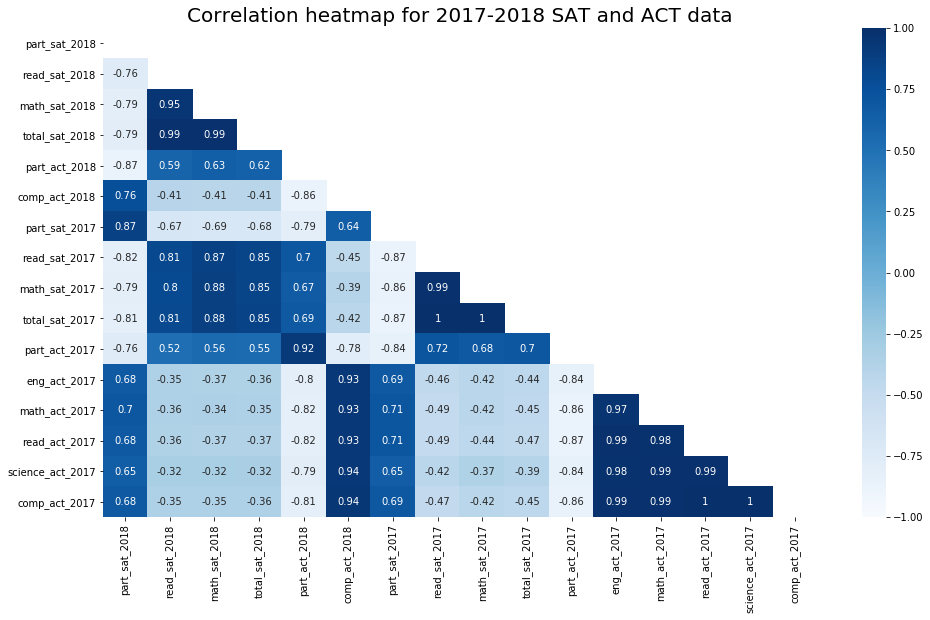

In [41]:
# mask to create triangle array with zeroes in upper right, then passed to sns.heatmap to stop
# from plotting those cells
mask = np.triu(np.ones_like(final.corr(), dtype=np.bool))

# plot heatmap with correlations for all numeric values
plt.figure(figsize=(16, 9))
sns.heatmap(data=final.corr(),
            annot=True,
            mask=mask,
            cmap='Blues',
            vmin=-1.0,
            vmax=1.0,
            )

plt.title('Correlation heatmap for 2017-2018 SAT and ACT data', fontsize=20)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

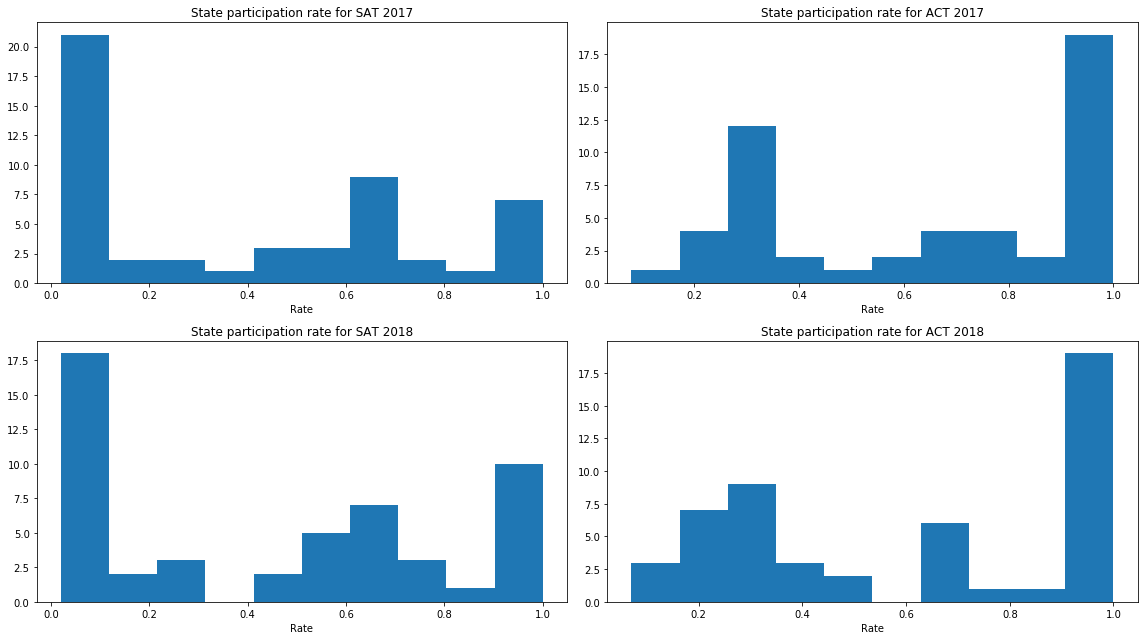

In [42]:
# function to plot histograms with. Given to us by overlords. Needed a bit of code and tweaking to work
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16, 9))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column])
    for i, title in enumerate(list_of_titles):
        ax[i].title.set_text(title)
    for i, label in enumerate(list_of_xlabels):
        ax[i].set_xlabel(label)
    fig.tight_layout()


subplot_histograms(final,
                   ['part_sat_2017', 'part_act_2017',
                       'part_sat_2018', 'part_act_2018'],
                   ['State participation rate for SAT 2017', 'State participation rate for ACT 2017',
                       'State participation rate for SAT 2018', 'State participation rate for ACT 2018'],
                   ['Rate', 'Rate', 'Rate', 'Rate']
                   )

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


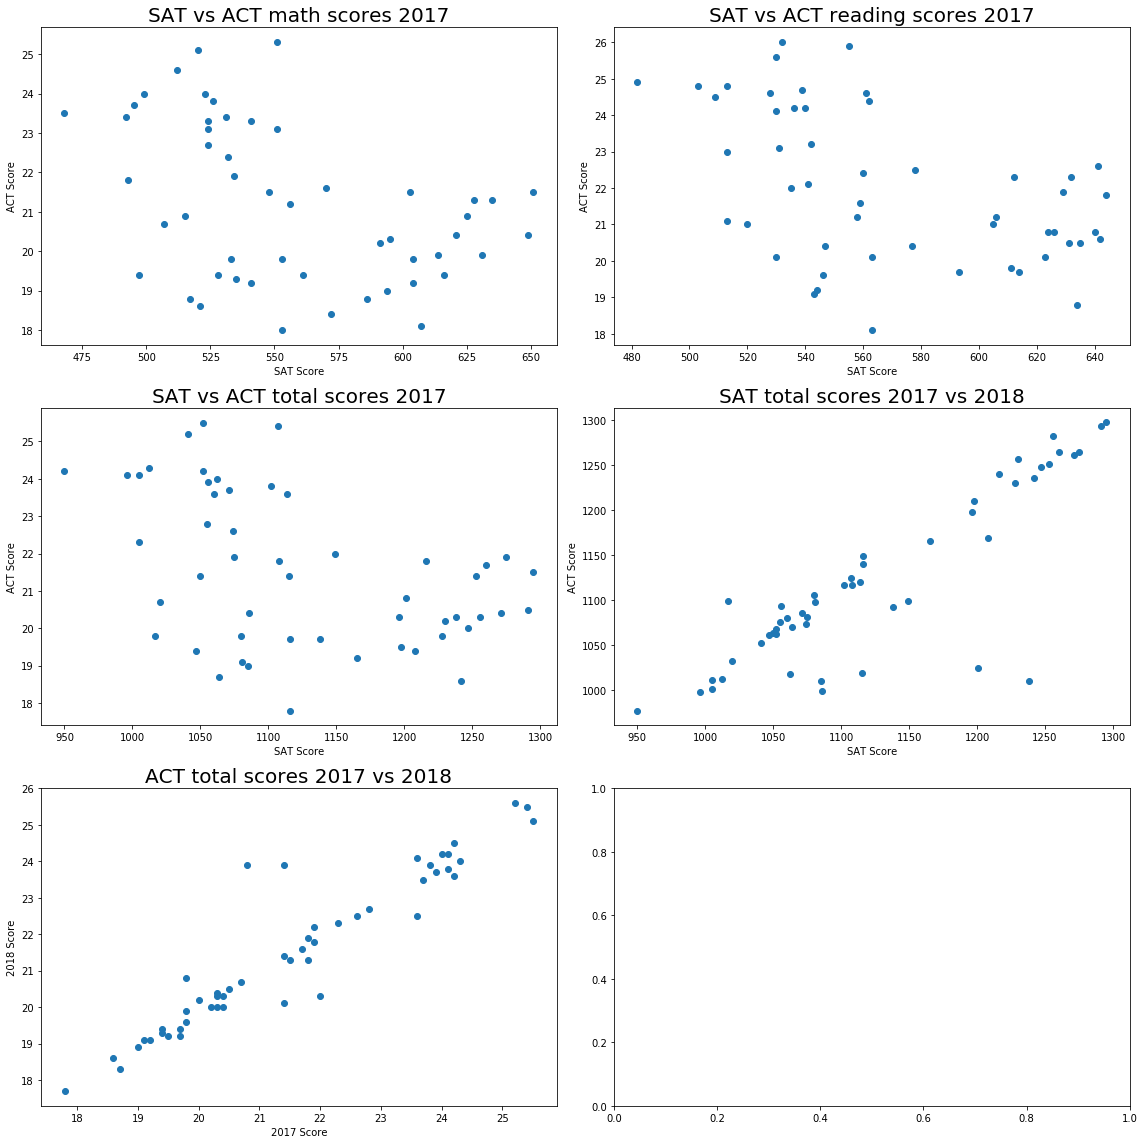

In [43]:
# function to create scatter subplots, adapted from provided histogram function above
def subplot_scatter(dataframe, list_of_x, list_of_y, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_x)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(
        16, 16))
    ax = ax.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_x):
        ax[i].scatter(dataframe[column], dataframe[list_of_y[i]])
    # Set titles, labels, etc here for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title, fontsize=20)
    for i, label in enumerate(list_of_xlabels):
        ax[i].set_xlabel(label, fontsize=10)
    for i, label in enumerate(list_of_ylabels):
        ax[i].set_ylabel(label, fontsize=10)
    fig.tight_layout()


subplot_scatter(final,
                ['math_sat_2017', 'read_sat_2017', 'total_sat_2017',
                    'total_sat_2017', 'comp_act_2017'],
                ['math_act_2017', 'read_act_2017', 'comp_act_2017',
                    'total_sat_2018', 'comp_act_2018'],
                ['SAT vs ACT math scores 2017', 'SAT vs ACT reading scores 2017', 'SAT vs ACT total scores 2017',
                    'SAT total scores 2017 vs 2018', 'ACT total scores 2017 vs 2018'],
                ['SAT Score', 'SAT Score', 'SAT Score', 'SAT Score', '2017 Score'],
                ['ACT Score', 'ACT Score', 'ACT Score', 'ACT Score', '2018 Score']
                )

These scatter plots don't show much more than 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [37]:

box_labels = ['SAT Participation 2018',
              'SAT Reading scores 2018',
              'SAT Math scores 2018',
              'SAT Total scores 2018',
              'ACT Participation 2018',
              'ACT Composite scores 2018',
              'SAT Participation 2017',
              'SAT Reading scores 2017',
              'SAT Math scores 2017',
              'SAT Total scores 2017',
              'ACT Participation 2017',
              'ACT English scores 2017',
              'ACT Math scores 2017',
              'ACT Reading scores 2017',
              'ACT Science scores 2017',
              'ACT Composite scores 2017']


plots = list(final.columns) # created list of final.df columns
plots.remove('state') # removed state from list

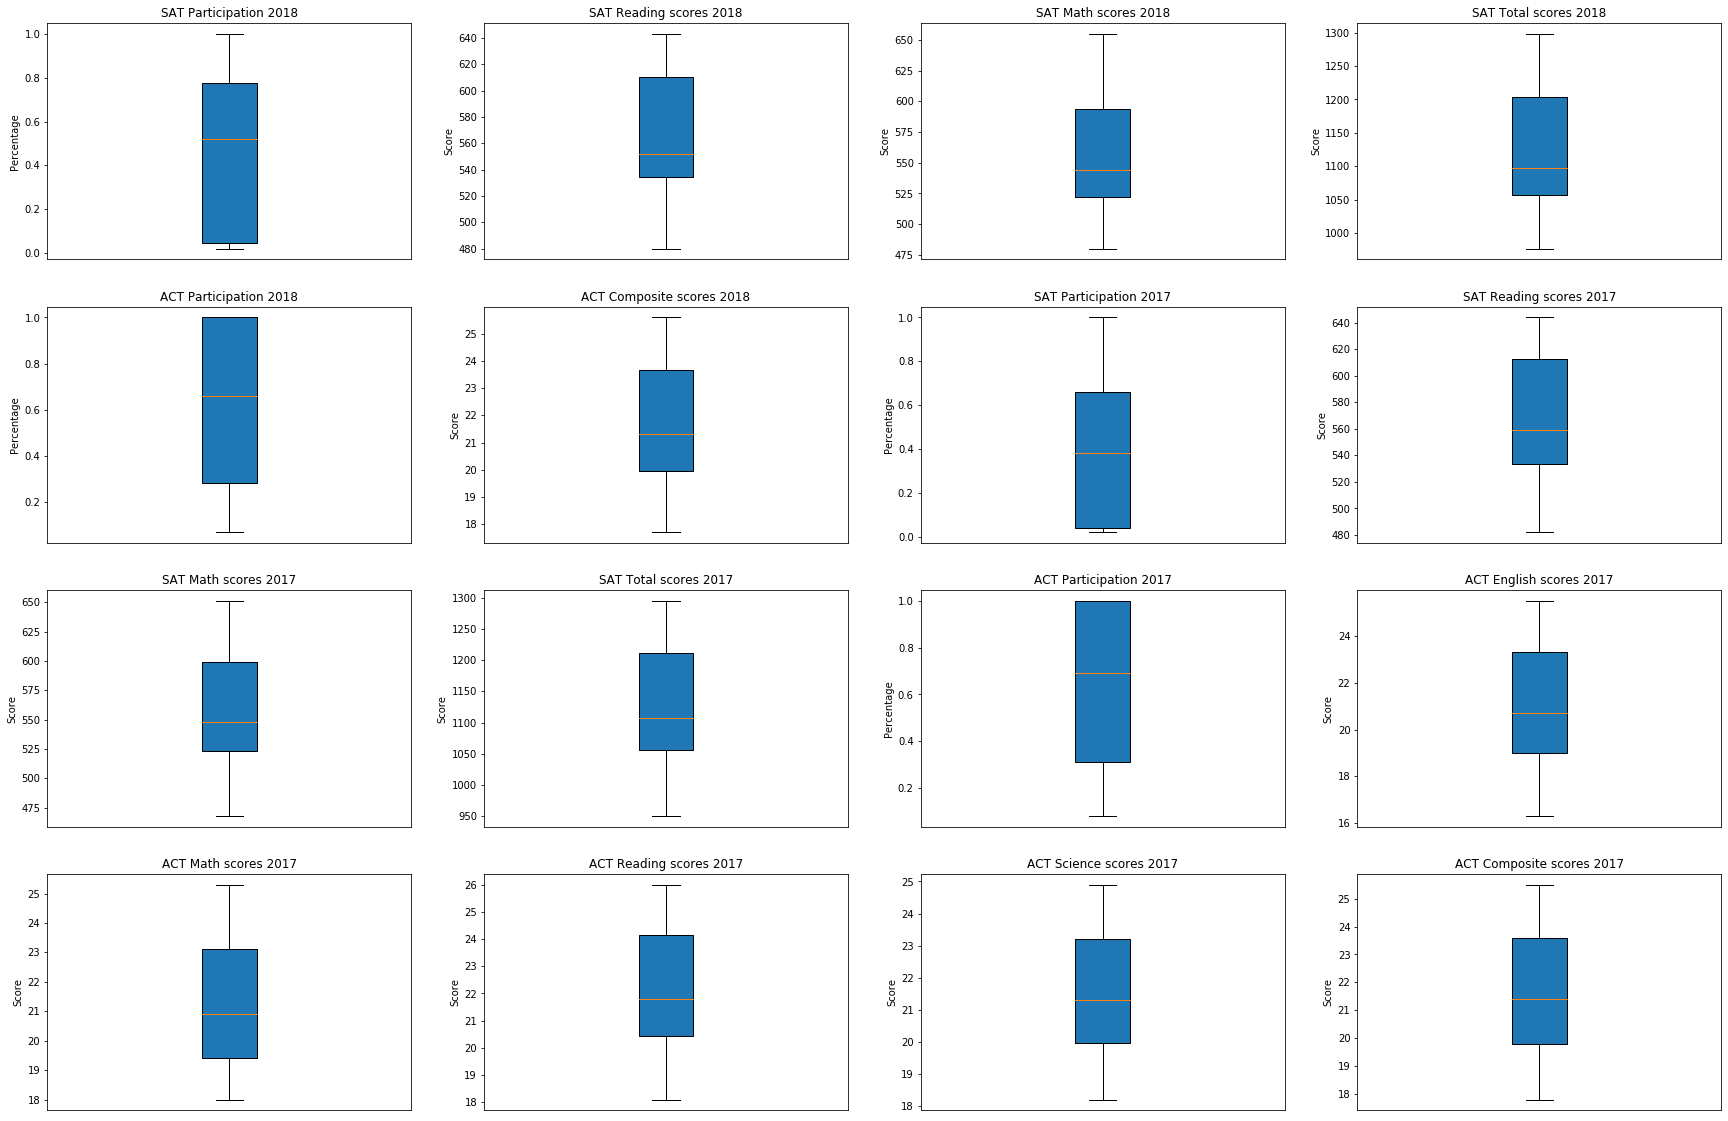

In [38]:
# function to print boxplots of each numeric column
def subplot_box(dataframe, plots, labels):
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(30, 20))
    ax = ax.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
    boxes = zip(plots, labels) # zip list of columns and list of labels together so I can upack in one for loop
    i = 0
    for plot, label in (boxes):
        ax[i].boxplot(dataframe[plot],
                      data=dataframe,
                      showfliers=True,
                      patch_artist=True
                      )
        ax[i].set_title(label)
        ax[i].set_xticks([])
        if 'scores' in label:
            ax[i].set_ylabel('Score')
        else:
            ax[i].set_ylabel('Percentage')
        i += 1


subplot_box(final, plots, box_labels)

>Scores don't really change much

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [61]:
# create list of labels containing 'Part' as quick way to filter
part_labels = [i for i in box_labels if 'Part' in i]
# create list of columns containing 'part' as quick way to filter
part_plots = [i for i in plots if 'part' in i]
# sort these lists
part_labels.sort()
part_plots.sort()

<Figure size 1152x1152 with 0 Axes>

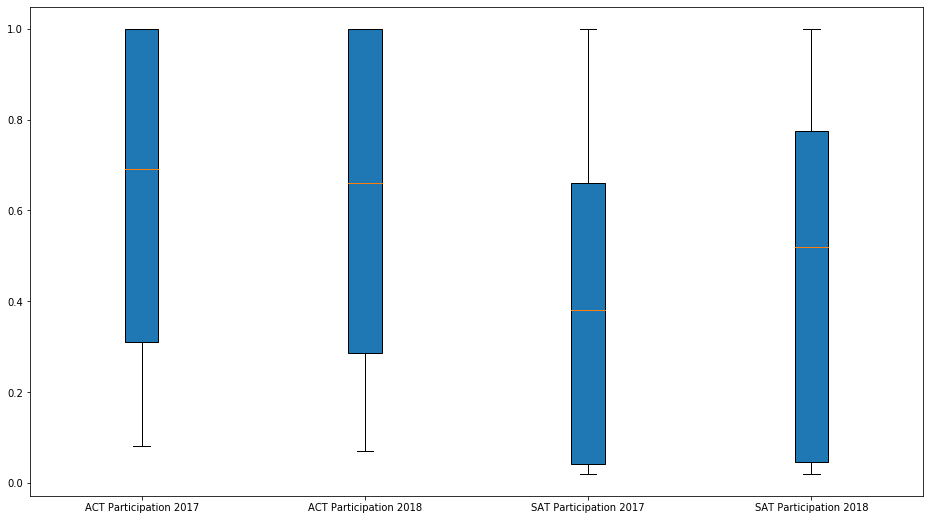

In [62]:
# plot boxplots of participation
plt.figure(figsize=(16, 16))
fig, ax = plt.subplots(figsize=(16, 9))
for i, plot in enumerate(part_plots):
    ax.boxplot(final[plot],
               positions=[i+1],
               meanline=True,
               patch_artist=True,
               autorange=True,
               showfliers=True,
               )
    ax.set_xticklabels(part_labels)

>ACT Participation saw a slight drop in mean participation, while SAT saw a very large jump.

### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

![caption](../data/Mean_SAT_Part.png)

>SAT and ACT participation appears to be a regional issue more than a state issue. I wonder if there are regional groups (Midwest Education something or other), which make decisions regarding education issues as a group of states.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

>Colorado: Changed from mandatory ACT testing to mandatory SAT testing. This completely reversed the participation rate for the state. 
Illinois: Also switched from ACT to SAT mandatory testing.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

>One way to increase participation in a state is to of course to increase mandatory testing. This seems like a short-term win here though. Colorado and Illinois certainly show how a mandatory SAT test can swing participation from 10% to 100%, but there is no reason this can't happen in a few years for ACT. States like Tennessee allow their school districts to make the decision regarding whether to require SAT or ACT testing. So both the regional location and the internal small localities are avenues College board should work.

>Recommendations:
-Increase state contracts, but this tends to be zero-sum
-Reach out more to local governments and school districts
-Keep funding SAT School days. This has been a popular program.
-Adapt to the new STEM focus. Math sections have a greater effect on total score vs ACT.
-Perhaps highlight portions showcasing ‘algorithmic/programmatic thinking’ etc.

>Pros for the states:
-Focus on school districts and local government. Midwest and
South often leave testing decisions up to school districts.
--ESSA gives states more ability to allow counties/districts
to make assessment decisions.
-Using SAT instead of state-created assessments is cheaper and
tests competencies better. This also makes compliance with
ESSA simpler.
-Ohio allows SAT scores above a certain level to be another path
to a high school diploma. Also makes compliance with ESSA
simpler.
-Continuity for the large number of students who take PSAT.

>Further data I could use:
-More granular data at the local level (counties, parishes, school boards etc.)
-PSAT data. How often does a student take the PSAT and then go on to take the SAT?
